# RFM analysis with K-Means


One of the potential values of ML in the restaurant business comes from the marketing part. The ability to classfy customers depending on different factors, specially to avoid churn and keep them holds a huge value from the bussiness perspective.

Though this information is not included in the front-end client, let it serve as a showcase of the work that has been done in order to get valuable information and models for the final product.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

For the sake of simplicity, there is already a file containing the RFM (recency, frequency and monetary) information about every online customer. The actual process for building this file is no important , since it is a simple ETL out of the scope of this work.

In [10]:
rfm = pd.read_csv('../data/rfm.csv')

In [11]:
rfm_scores = rfm[['customer_id','recency_score','frequency_score','monetary_mean_score']]
rfm_scores = rfm_scores.set_index('customer_id',drop=True)

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(rfm_scores)
    wcss.append(kmeans.inertia_)

Let's build the elbow graph to find out the best number of clusters.

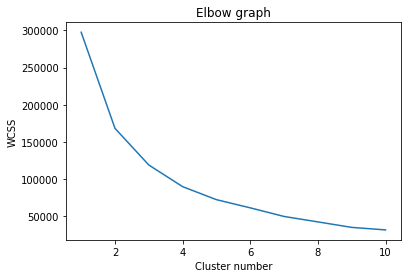

In [14]:
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

It seems that the best option is 3 clusters.

In [15]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
cluster = kmeans.fit_predict(rfm_scores)

In [16]:
rfm['cluster'] = cluster

In [17]:
rfm.head(5)

,frequency,monetary,first_name,last_name,recency,last_order,customer_id,monetary_score,recency_score,frequency_score,monetary_mean,monetary_mean_score,cluster
0,10,43.79,José Luis,Cabañero,6,2019-04-23 15:44:48,1,6,3,7,4.379000,17.52,0
1,3,9.08,Lucas,Tenorio - Batavia,2,2019-04-27 12:00:14,19,1,1,2,3.026667,12.12,0
2,12,105.50,Santiago,Andres,25,2019-04-04 13:29:27,24,13,12,9,8.791667,35.16,0
3,14,189.75,Lola,Pardo,47,2019-03-13 14:03:04,28,24,23,10,13.553571,54.20,0
4,14,171.50,Eva,Menendez,28,2019-04-01 12:55:38,29,22,14,10,12.250000,49.00,0


Text(0.5,0,'Monetary')

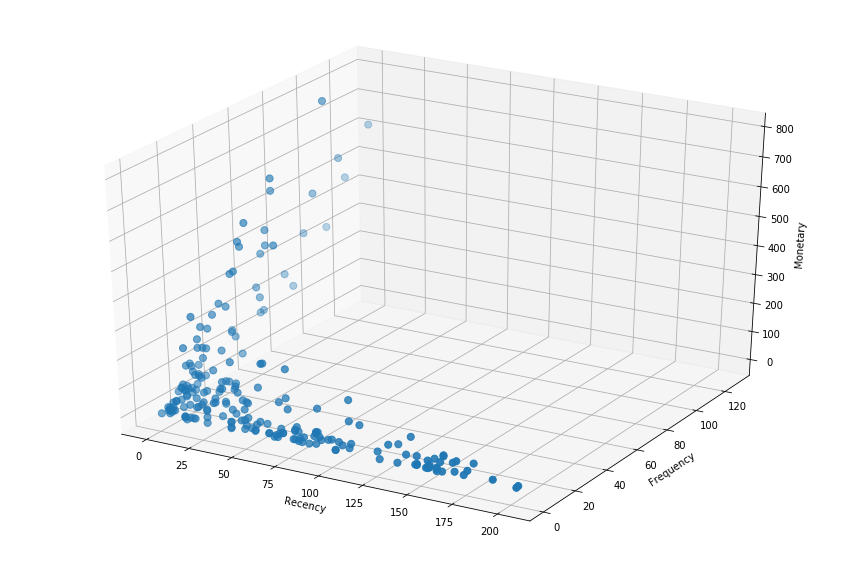

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm.recency, rfm.frequency, rfm.monetary, s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')


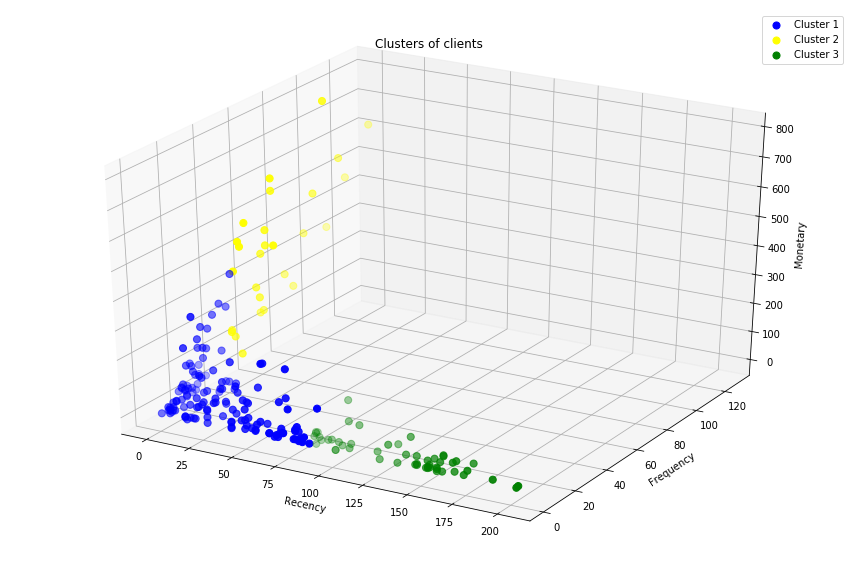

In [21]:
fig = plt.figure(figsize=(15,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['blue', 'yellow', 'green']

for i in range(0,3):
    dx.scatter(rfm[rfm.cluster == i].recency, 
               rfm[rfm.cluster == i].frequency, 
               rfm[rfm.cluster == i].monetary, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=50)

dx.set_title('Clusters of clients')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()

Text(0,0.5,'Frequency')

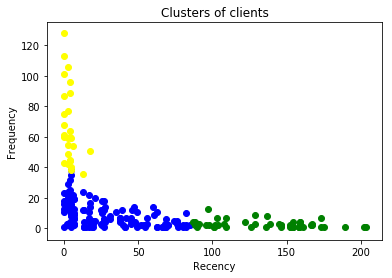

In [22]:
c1 = rfm[rfm.cluster == 0]
c2 = rfm[rfm.cluster == 1]
c3 = rfm[rfm.cluster == 2]

plt.scatter(c1.recency, c1.frequency, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.recency, c2.frequency, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.recency, c3.frequency, c = 'green', label = 'Cluster 3')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Frequency')

Text(0,0.5,'Monetary')

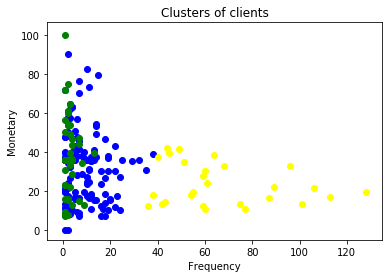

In [23]:
# Using moneraty mean score.
c1 = rfm[rfm.cluster == 0]
c2 = rfm[rfm.cluster == 1]
c3 = rfm[rfm.cluster== 2]


plt.scatter(c1.frequency, c1.monetary_mean_score, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.frequency, c2.monetary_mean_score, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.frequency, c3.monetary_mean_score, c = 'green', label = 'Cluster 3')


plt.title('Clusters of clients')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

Text(0,0.5,'Monetary')

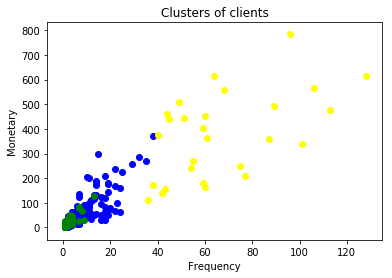

In [27]:
# Using monetary
c1 = rfm[rfm.cluster == 0]
c2 = rfm[rfm.cluster == 1]
c3 = rfm[rfm.cluster== 2]


plt.scatter(c1.frequency, c1.monetary, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.frequency, c2.monetary, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.frequency, c3.monetary, c = 'green', label = 'Cluster 3')

plt.title('Clusters of clients')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

### Interpreting the data...

* Blue cluster (#0) belongs to somehow frequent customers with a medium/high fidelity and a wide cost range per order. This can be considered a __cluster of customers to increase their loyalty__ with some kind of marketing strategy.

* Yellow cluster (#1) belongs to very frequent customers with a medium/low price cost per order. This is the __loyal customer__ cluster

* Green cluster (#2) corresponds to low frequency and low recency level. These are __ocassional customers__


In [24]:
countByCluster = rfm.groupby('cluster').count()['frequency']
count = rfm.count()['cluster']

In [25]:
percentCountByCluster = countByCluster * 100 /count;

In [26]:
percentCountByCluster

cluster
0    63.926941
1    12.328767
2    23.744292
Name: frequency, dtype: float64

* 63% are customers to increase loyalty
* 12% are loyal customers
* 23% are sporadic customers

# Hierarchy clustering

Let's try another technique to see if we can find a smarter set of clusters.

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [75]:
rfmh = rfm[['recency_score','frequency_score','monetary_mean_score']]
Z = linkage(rfmh, 'ward')

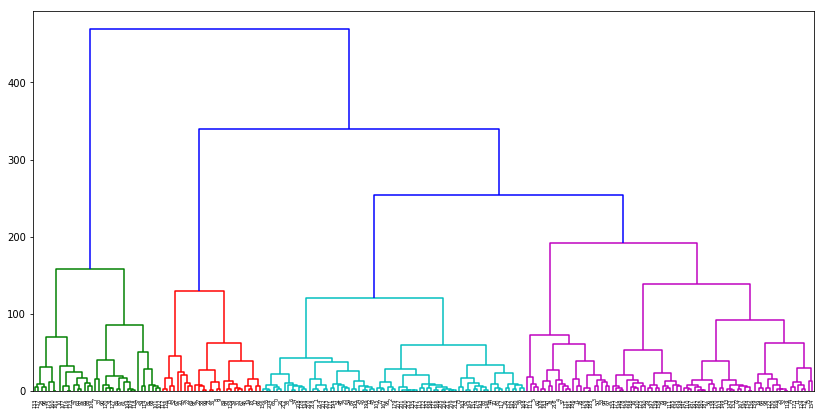

In [76]:
plt.figure(figsize=(14, 7))
dendrogram(Z, color_threshold=250)
plt.show()

In [70]:
import numpy as np
from scipy.cluster.hierarchy import fcluster

In [71]:
cut_distance = 250
clusters_hc = fcluster(Z, t = cut_distance, criterion='distance')
np.unique(clusters_hc, return_counts = True)

(array([1, 2, 3, 4], dtype=int32), array([36, 28, 74, 81]))

In [72]:
clusters_hc

array([3, 3, 3, 4, 4, 4, 3, 1, 2, 2, 1, 4, 3, 4, 2, 2, 4, 2, 2, 4, 2, 2,
       2, 3, 3, 4, 3, 2, 1, 4, 2, 1, 4, 1, 3, 3, 2, 4, 3, 2, 4, 4, 2, 3,
       3, 3, 2, 1, 3, 4, 4, 3, 2, 4, 3, 3, 4, 1, 2, 1, 4, 1, 2, 1, 4, 3,
       2, 2, 1, 2, 3, 4, 4, 3, 4, 4, 3, 3, 4, 4, 3, 1, 3, 3, 3, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 4, 3, 1, 4, 4, 2, 4, 1, 1, 4, 1, 3, 1, 1, 4, 1,
       4, 4, 2, 4, 1, 3, 1, 3, 1, 4, 1, 3, 4, 1, 4, 4, 2, 1, 3, 2, 4, 4,
       4, 1, 4, 3, 4, 1, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 3, 3, 3, 4,
       4, 4, 3, 4, 4, 4, 1, 1, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 1,
       4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3],
      dtype=int32)

In [66]:
from sklearn.cluster import AgglomerativeClustering

# define the model
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  

# fit data and predict 
clusters = cluster.fit_predict(rfmh)

In [77]:
clusters

array([3, 3, 3, 0, 0, 0, 3, 1, 2, 2, 1, 0, 3, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 3, 3, 0, 3, 2, 1, 0, 2, 1, 0, 1, 3, 3, 2, 0, 3, 2, 0, 0, 2, 3,
       3, 3, 2, 1, 3, 0, 0, 3, 2, 0, 3, 3, 0, 1, 2, 1, 0, 1, 2, 1, 0, 3,
       2, 2, 1, 2, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 1, 3, 3, 3, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 0, 3, 1, 0, 0, 2, 0, 1, 1, 0, 1, 3, 1, 1, 0, 1,
       0, 0, 2, 0, 1, 3, 1, 3, 1, 0, 1, 3, 0, 1, 0, 0, 2, 1, 3, 2, 0, 0,
       0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0,
       0, 0, 3, 0, 0, 0, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 1,
       0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3])

Text(0,0.5,'Frequency')

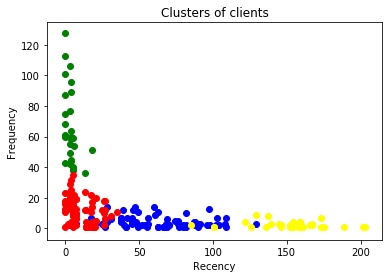

In [100]:
c1 = rfm[clusters == 0]
c2 = rfm[clusters == 1]
c3 = rfm[clusters == 2]
c4 = rfm[clusters == 3]


plt.scatter(c1.recency, c1.frequency, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.recency, c2.frequency, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.recency, c3.frequency, c = 'green', label = 'Cluster 3')
plt.scatter(c4.recency, c4.frequency, c = 'red', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Frequency')

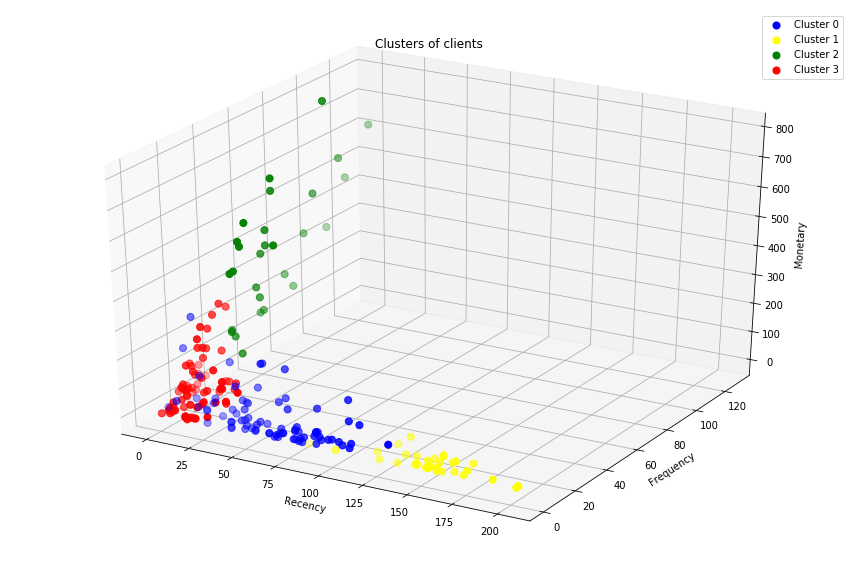

In [83]:
fig = plt.figure(figsize=(15,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['blue', 'yellow', 'green', 'red','magenta']

for i in range(0,4):
    dx.scatter(rfm[clusters == i].recency, 
               rfm[clusters == i].frequency, 
               rfm[clusters == i].monetary, 
               c = colors[i], 
               label = 'Cluster ' + str(i), 
               s=50)

dx.set_title('Clusters of clients')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()

### Interpreting the data...

* Blue cluster (#0) belongs to somehow frequent customers with a medium/high fidelity and a wide cost range per order. This can be considered a __cluster of customers to increase their loyalty__ with some kind of marketing strategy.

* Yellow cluster (#1) belongs to low frequency customers with a medium/low price cost per order. This is the __very ocassional customer__ cluster

* Green cluster (#2) corresponds to high frequency and low recency level. These are __loyal customers__

* Red cluster (#3) corresponds to __ocassional customers__, with low frequency and recency.


In [81]:
rfm.loc[clusters==0, 'cluster'] = 0
rfm.loc[clusters==1, 'cluster'] = 1
rfm.loc[clusters==2, 'cluster'] = 2
rfm.loc[clusters==3, 'cluster'] = 3

rfm['cluster'] = rfm['cluster'].astype(int)

In [82]:
rfm.to_csv('/tmp/rfm.csv')

In [79]:
rfm

,frequency,monetary,first_name,last_name,recency,last_order,customer_id,monetary_score,recency_score,frequency_score,monetary_mean,monetary_mean_score,cluster
0,10,43.79,José Luis,Cabañero,6,2019-04-23 15:44:48,1,6,3,7,4.379000,17.52,3.0
1,3,9.08,Lucas,Tenorio - Batavia,2,2019-04-27 12:00:14,19,1,1,2,3.026667,12.12,3.0
2,12,105.50,Santiago,Andres,25,2019-04-04 13:29:27,24,13,12,9,8.791667,35.16,3.0
3,14,189.75,Lola,Pardo,47,2019-03-13 14:03:04,28,24,23,10,13.553571,54.20,0.0
4,14,171.50,Eva,Menendez,28,2019-04-01 12:55:38,29,22,14,10,12.250000,49.00,0.0
5,15,297.03,Yolanda,Alonso,5,2019-04-24 14:46:59,30,38,2,11,19.802000,79.20,0.0
6,10,58.22,Susana,Fernandez,5,2019-04-24 12:20:04,31,7,2,7,5.822000,23.28,3.0
7,1,9.00,Enrique,Alvarez Izquierdo,203,2018-10-08 15:11:03,32,1,100,0,9.000000,36.00,1.0
8,54,241.98,Jose,Montero,6,2019-04-23 09:12:13,33,31,3,42,4.481111,17.92,2.0
9,55,270.04,Ana,Monjas,3,2019-04-26 12:00:39,34,34,1,43,4.909818,19.64,2.0
